# Assignment 1---- 190531L----Rukmal.M.A.D

Github link- https://github.com/DilukshaRukmal/Computer_vision.git

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

Question 1

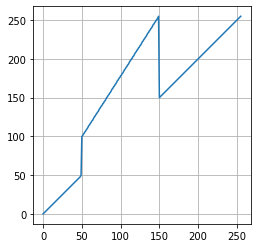

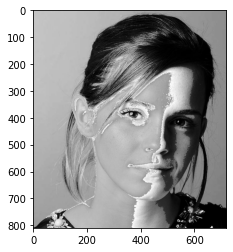

In [4]:
img = cv.imread(r'D:\Image processing module\Assignment 1\emma_gray.jpg')
assert img is not None

t1 = np.linspace(0,50,50)
t2 = np.linspace(100,255,100)
t3 = np.linspace(150,255,106)
t = np.concatenate((t1,t2,t3),axis= 0).astype(np.uint8)
fig,ax = plt.subplots()
ax.grid()
plt.plot(t)
ax.set_aspect('equal')
assert len(t) == 256
t_img = cv.LUT(img,t)
fig,ax = plt.subplots()
ax.imshow(t_img)
plt.show()

Question 2(a)

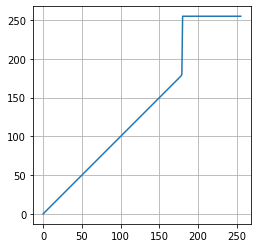

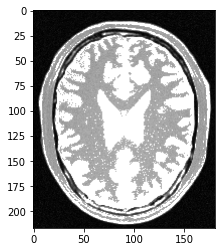

In [5]:
img = cv.imread(r'D:\Image processing module\Assignment 1\brain_proton_density_slice.png',cv.IMREAD_COLOR)
assert img is not None

t1 = np.linspace(0,180,180)
t2 = np.linspace(255,255,76)
#t3 = np.linspace(255,255,106)
t = np.concatenate((t1,t2),axis= 0).astype(np.uint8)
fig,ax = plt.subplots()
ax.grid()
plt.plot(t)
ax.set_aspect('equal')
assert len(t) == 256
t_img = cv.LUT(img,t)
fig,ax = plt.subplots()
ax.imshow(t_img)
plt.show()

Question 2(b)

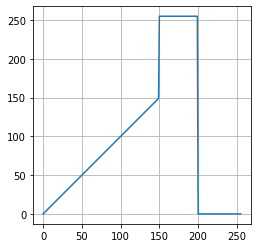

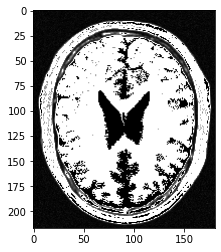

In [39]:
img = cv.imread(r'D:\Image processing module\Assignment 1\brain_proton_density_slice.png',cv.IMREAD_COLOR)
assert img is not None

t1 = np.linspace(0,150,150)
t2 = np.linspace(255,255,50)
t3 = np.linspace(0,0,56)
t = np.concatenate((t1,t2,t3),axis= 0).astype(np.uint8)
fig,ax = plt.subplots()
ax.grid()
plt.plot(t)
ax.set_aspect('equal')
assert len(t) == 256
t_img = cv.LUT(img,t)
fig,ax = plt.subplots()
ax.imshow(t_img)
plt.show()

Question 3

Gamma= 0.5


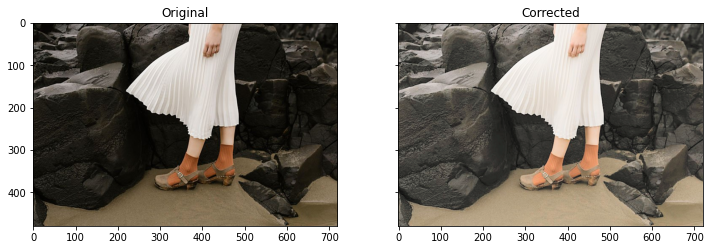

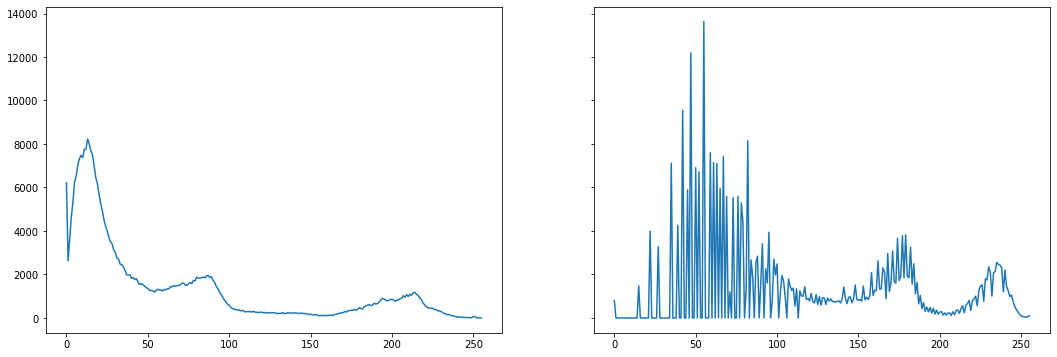

In [52]:
img = cv.imread("highlights_and_shadows.jpg",cv.IMREAD_COLOR)
Labimg= cv.cvtColor(img, cv.COLOR_BGR2Lab)
L,a,b = cv.split(Labimg)
fig,ax= plt.subplots(1,2, sharex='all', sharey='all', figsize=(12,6))
gamma = 0.5
T = np.array([(p/255)**gamma*255 for p in range(0,256)]).astype(np.uint8)
transformed_img = cv.LUT(L, T)
Labimg[:,:,0] = transformed_img
Labimg[:,:,1] = a
Labimg[:,:,2] = b
print("Gamma=",gamma)
ax[0].imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))
ax[0].set_title("Original")
ax[1].imshow(cv.cvtColor(Labimg,cv.COLOR_LAB2RGB))
ax[1].set_title("Corrected")
#histograms
fig,ax= plt.subplots(1,2, sharex='all', sharey='all', figsize=(18,6))
hist_img = cv.calcHist([img],[0],None,[256],[0,256])
hist_transformed_img = cv.calcHist([Labimg],[0],None,[256],[0,256])
ax[0].plot(hist_img)
ax[1].plot(hist_transformed_img)


Question 4

In [53]:
def equalHist(img):# function for equalization
    # convert img into numpy array
    image_array = np.asarray(img)
    histogram_array = np.bincount(image_array.flatten(),minlength =256)
    #normalize the histogram
    num_pixels = np.sum(histogram_array)
    histogram_array = histogram_array/num_pixels
    # normalized cumulated histogrm
    c_histogram_array = np.cumsum(histogram_array)
    # pixel mapping table
    transform_map = np.floor(255*c_histogram_array).astype(np.uint8)
    
    img_list = list(image_array.flatten())
    #Applying transformation
    eq_img_list = [transform_map[p] for p in img_list]
    eq_img_array = np.reshape(np.asarray(eq_img_list),image_array.shape)
    return eq_img_array 

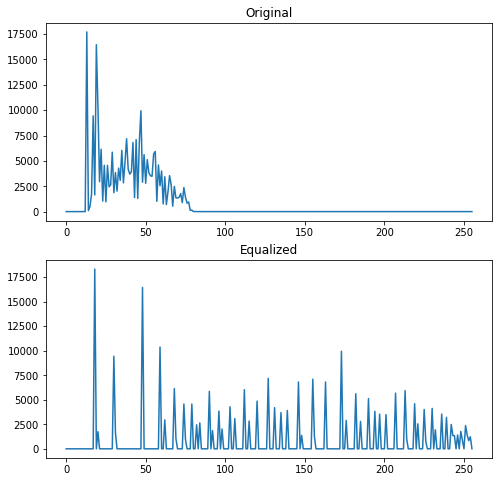

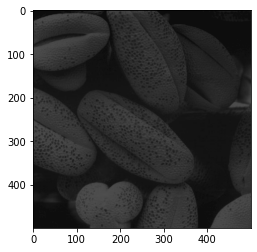

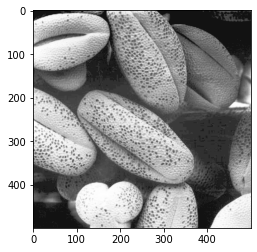

In [54]:
img = cv.imread(r'D:\Image processing module\Assignment 1\shells.png',cv.IMREAD_GRAYSCALE)
assert img is not None
hist_img = cv.calcHist([img],[0],None,[256],[0,256])
E_img = equalHist(img) # written function
E_hist_img = cv.calcHist([E_img],[0],None,[256],[0,256])
fig,ax = plt.subplots(2,1,figsize=(8,8))
ax[0].title.set_text("Original")
ax[1].title.set_text("Equalized")
ax[0].plot(hist_img)
ax[1].plot(E_hist_img)
img_o = cv.cvtColor(img,cv.COLOR_BGR2RGB)
fig,ax = plt.subplots()
ax.imshow(img_o)
plt.show()
E_img_plt = cv.cvtColor(E_img,cv.COLOR_BGR2RGB)
fig,ax = plt.subplots()
ax.imshow(E_img_plt)
plt.show()

Question 5 (a)

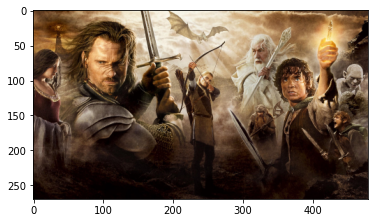

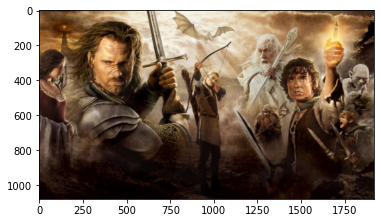

C:\Users\diluk\AppData\Local\Temp\ipykernel_12616\684434554.py:36: RuntimeWarning: overflow encountered in ubyte_scalars
  difference = zoomedImage[x,y,c] - zoomedOriginal[x,y,c]


SSD= 0.06276031012300784


In [55]:
#Nearest-Neighbor
def zoom(factor,img):
    height = img.shape[0]# get height of img
    width = img.shape[1]
    zoomedImage = np.zeros((height*factor,width*factor,3),'uint8') # to store new img
    for color in range(0,3):
        for x in range(0,height):
            for y in range(0,width):
                for i in range(x*factor,(x+1)*factor):
                    for j in range(y*factor,(y+1)*factor):
                        zoomedImage[i,j,color] = img[x,y,color]
    return zoomedImage

img = cv.imread(r'D:\Image processing module\Assignment 1\a1q5images\im01small.png',cv.IMREAD_COLOR)
factor = 4 #zooming factor
zoomedImage = zoom(factor,img)
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
zoomedImage = cv.cvtColor(zoomedImage,cv.COLOR_BGR2RGB)
fig,ax = plt.subplots()
img_plt = cv.cvtColor(img,cv.COLOR_BGR2RGB)
ax.imshow(img)
plt.show()

fig,ax = plt.subplots()
ax.imshow(zoomedImage)
plt.show()

#SSD
zoomedOriginal =cv.imread(r'D:\Image processing module\Assignment 1\a1q5images\im01.png',cv.IMREAD_COLOR)
error = 0.0
height = zoomedImage.shape[0]
width = zoomedImage.shape[1]
for x in range(0,height):
    for y in range(0,width):
        for c in range(0,3):
            difference = zoomedImage[x,y,c] - zoomedOriginal[x,y,c]
            error += (difference)**2
error = (error**0.5)/(height*width*3)
print("SSD=",error)

In nearest- neighbor method, if the zooming factor is n, n x n square of pixels in zoomed image are filled with the color and intensity of considering pixel of original image.

Question 5 (b)

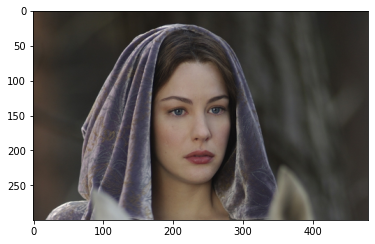

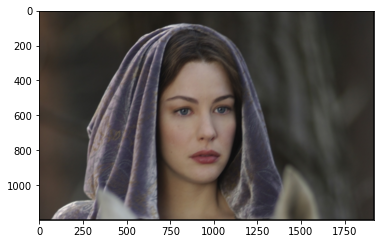

C:\Users\diluk\AppData\Local\Temp\ipykernel_12616\705930946.py:48: RuntimeWarning: overflow encountered in ubyte_scalars
  difference = zoomedImage[x,y,c] - zoomedOriginal[x,y,c]


SSD= 0.06393107662321662


In [57]:
#Bilinear Interpolation
def onePlane(factor,p1,p2,p3,p4,c):
    zoomedSquare = np.zeros((factor,factor),float)
    topRow = np.linspace(p1[c],p2[c],factor)
    bottomRow = np.linspace(p3[c],p4[c],factor)
    for i in range(0,factor):
        zoomedSquare[i] = np.linspace(topRow[i],bottomRow[i],factor)
    return zoomedSquare

def getZoomedSquare(factor,p1,p2,p3,p4):
    b = onePlane(factor,p1,p2,p3,p4,0)
    g = onePlane(factor,p1,p2,p3,p4,1)
    r = onePlane(factor,p1,p2,p3,p4,2)
    zoomedSquare = cv.merge((b,g,r))
    return zoomedSquare

img = cv.imread(r'D:\Image processing module\Assignment 1\a1q5images\im02small.png',cv.IMREAD_COLOR)
factor = 4 #zooming factor
height = img.shape[0]
width = img.shape[1]
zoomedImage = np.zeros((height*factor,width*factor,3),'uint8')
for x in range(0,height - 1):
    for y in range(0,width - 1):
        zoomedSquare = getZoomedSquare(factor,img[x,y],img[x,y+1],img[x+1,y],img[x+1,y+1])
        for i in range(x*factor,(x+1)*factor):
            for j in range(y*factor,(y+1)*factor):
                zoomedImage[i,j] = zoomedSquare[i-x*factor,j-y*factor]
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
zoomedImage = cv.cvtColor(zoomedImage,cv.COLOR_BGR2RGB)

fig,ax = plt.subplots()
img_plt = cv.cvtColor(img,cv.COLOR_BGR2RGB)
ax.imshow(img)
plt.show()

fig,ax = plt.subplots()
ax.imshow(zoomedImage)
plt.show()

#SSD
zoomedOriginal =cv.imread(r'D:\Image processing module\Assignment 1\a1q5images\im02.png',cv.IMREAD_COLOR)
error = 0.0
height = zoomedImage.shape[0]
width = zoomedImage.shape[1]
for x in range(0,height):
    for y in range(0,width):
        for c in range(0,3):
            difference = zoomedImage[x,y,c] - zoomedOriginal[x,y,c]
            error += (difference)**2
error = (error**0.5)/(height*width*3)
print("SSD=",error)

In Bilinear interpolation method, if the zooming factoris n, n x n square of pixels is created for each pixel
in original image in which the intensity of corner edges is equal to the particular pixel in original image and
three neighborhood pixels which makes a square along with the particular pixel. Then the rest of the pixels
of n x n square of pixels is filled using gradients. So those n x n squares of pixels are combined and makes
the zoomed image

Question 6(a)

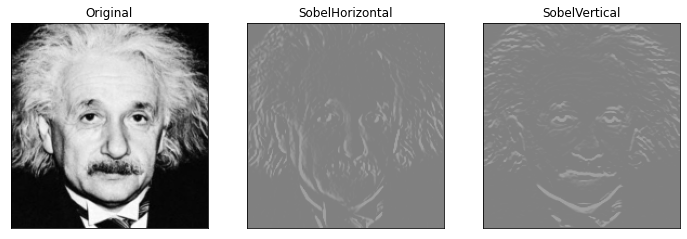

In [61]:
img= cv.imread(r'D:\Image processing module\Assignment 1\einstein.png',cv.IMREAD_REDUCED_GRAYSCALE_2)

kernel=np.array([(-1,0,1),(-2,0,2),(-1,0,1)],dtype='float')
imgc2=cv.filter2D(img,-1,kernel)

kernel2=np.array([(-1,-2,-1),(0,0,0),(1,2,1)],dtype='float')
imgc3=cv.filter2D(img,-1,kernel2)

fig,axes=plt.subplots(1,3,sharex='all',sharey='all',figsize=(12,12))
axes[0].imshow(img,cmap='gray')
axes[0].set_title('Original')
axes[0].set_xticks([]),axes[0].set_yticks([])
axes[1].imshow(imgc2,cmap='gray',vmin=-1020,vmax=1020)
axes[1].set_title('SobelHorizontal')
axes[1].set_xticks([]),axes[1].set_yticks([])
axes[2].imshow(imgc3,cmap='gray',vmin=-1020,vmax=1020)
axes[2].set_title('SobelVertical')
axes[2].set_xticks([]),axes[1].set_yticks([])
plt.show()


Question 6(b)

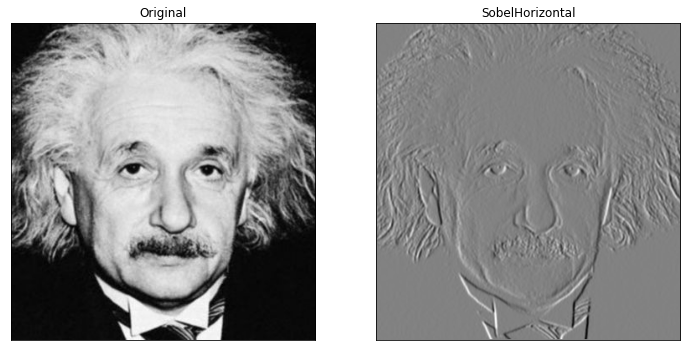

In [68]:
import math
def sobel_filtering(img,kernal):
    assert kernal.shape[0]%2==1 and kernal.shape[1]%2==1
    kernel_h , kernel_w = math.floor(kernal.shape[0]/2),math.floor(kernal.shape[1]/2)
    height,width =img.shape
    img_float = cv.normalize(img.astype('float'),None,0.0,1.0,cv.NORM_MINMAX)
    filtered = np.zeros(img.shape,'float')
    for x in range(kernel_h,height-kernel_h):
        for y in range(kernel_w,width-kernel_w):
            filtered[x,y] = np.dot(img_float[x-kernel_h:x+kernel_h+1,y-kernel_w:y+kernel_w+1].flatten(),kernal.flatten())
    
    return filtered

img= cv.imread(r'D:\Image processing module\Assignment 1\einstein.png',cv.IMREAD_GRAYSCALE).astype('float32')

kernel=np.array([(-1,0,1),(-2,0,2),(-1,0,1)],dtype='float')
imgc2 = sobel_filtering(img,kernel)

fig,axes=plt.subplots(1,2,sharex='all',sharey='all',figsize=(12,12))
axes[0].imshow(img,cmap='gray')
axes[0].set_title('Original')
axes[0].set_xticks([]),axes[0].set_yticks([])
axes[1].imshow(imgc2,cmap='gray')
axes[1].set_title('SobelHorizontal')
axes[1].set_xticks([]),axes[1].set_yticks([])
plt.show()


Question 6(c)

([], [])

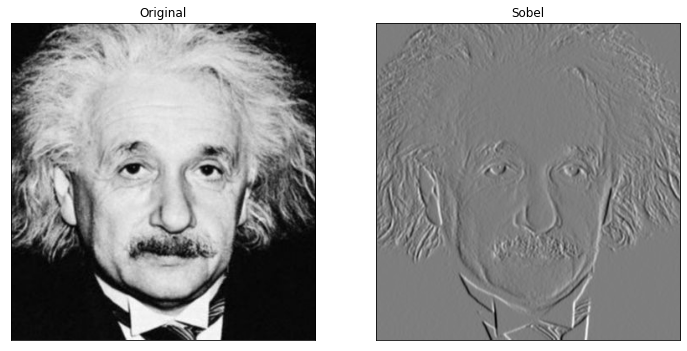

In [96]:
kernel1=np.array([(1,),(2,),(1,)],dtype='float')
kernel2=np.array([(1,0,-1)],dtype='float')
kernel = np.matmul(kernel1,kernel2)
filtered_img=cv.filter2D(img,-1,kernel)

fig,axes=plt.subplots(1,2,sharex='all',sharey='all',figsize=(12,12))
axes[0].imshow(img,cmap='gray')
axes[0].set_title('Original')
axes[0].set_xticks([]),axes[0].set_yticks([])
axes[1].imshow(filtered_img,cmap='gray')
axes[1].set_title('Sobel')
axes[1].set_xticks([]),axes[1].set_yticks([])

Question 7

Text(0.5, 1.0, 'Background')

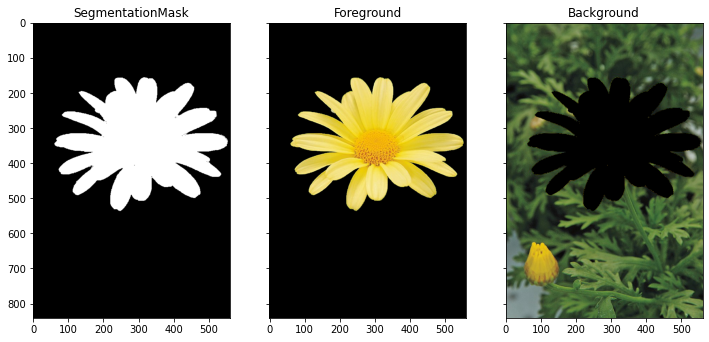

In [100]:
fig,ax= plt.subplots(1,3, sharex='all', sharey='all', figsize=(12,6))
img = cv.imread("daisy.jpg",cv.IMREAD_COLOR)
assert img is not None

imgmask = np.zeros(img.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (0,100,600,500)
(M, bgModel, fgModel) = cv.grabCut(img,imgmask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)
outputMask = np.where((imgmask == cv.GC_BGD) | (imgmask == cv.GC_PR_BGD),	0, 1)
outputMask = (outputMask * 255).astype("uint8")
foreground = cv.bitwise_and(img, img, mask=outputMask)
backgroud = cv.subtract(img,foreground)
ax[0].imshow(cv.cvtColor(outputMask, cv.COLOR_BGR2RGB))
ax[0].set_title("SegmentationMask")
ax[1].imshow(cv.cvtColor(foreground, cv.COLOR_BGR2RGB))
ax[1].set_title("Foreground")
ax[2].imshow(cv.cvtColor(backgroud, cv.COLOR_BGR2RGB))
ax[2].set_title("Background")

Text(0.5, 1.0, 'Background_blured')

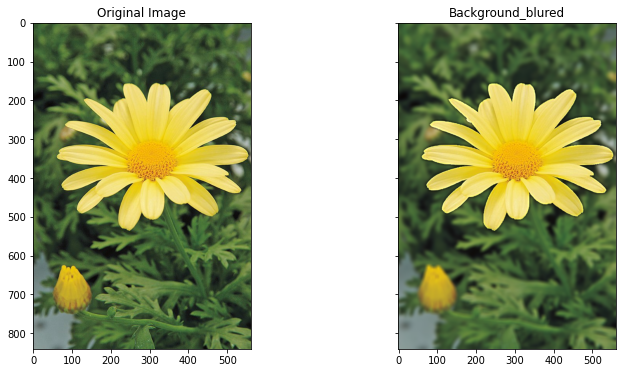

In [108]:
fig,ax= plt.subplots(1,2, sharex='all', sharey='all', figsize=(12,6))
img = cv.imread("daisy.jpg",cv.IMREAD_COLOR)
assert img is not None

blur_backgroud = cv.GaussianBlur(backgroud,(11,11),7)
final = cv.add(blur_backgroud,foreground)
ax[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[0].set_title("Original Image")
ax[1].imshow(cv.cvtColor(final, cv.COLOR_BGR2RGB))
ax[1].set_title("Background_blured")